# STEP 1 : BUSSINESS PROBLEM
- Identify relationship between total advertisement spend and sales ?
- Our next ad compaign will have a total spend of $200000, how many units do we expect to sell as a result of this ?

# STEP 2 : DATA UNDERSTANDING
- **DATA :** This sample data displays sales for a particular product as a function of advertiseing budget(in dollars) for TV, radio and news paper media
- **Independent variables :**
     1. `TV`         : Adevertiseing dollars spend on TV for a single product in a given market (in dollars)
     2. `Radio`      : Advertising dollars spend on radio
     3. `News paper` : Advertising dollars spend on news paper
- **Target Varible**
     1. `Sales`      : sales of a single product in a given market

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [11]:
df = pd.read_csv("Advertising.csv")
df.head(3)

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [13]:
# TV + radio + news paper = total sales
df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]

In [15]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [16]:
continous = ["sales","total_spend"]

**Explanatory Data Analysis(EDA)**

In [17]:
df[continous].describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


In [18]:
df[continous].skew()

sales          0.407571
total_spend    0.049488
dtype: float64

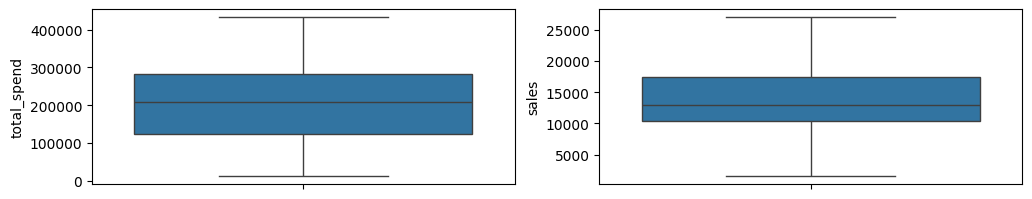

In [19]:
plt.figure(figsize = (12,5))
plt.subplot(2,2,1)
sns.boxplot(df["total_spend"])

plt.subplot(2,2,2)
sns.boxplot(df["sales"])

plt.show()

In [20]:
df = df[["sales","total_spend"]]

In [21]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


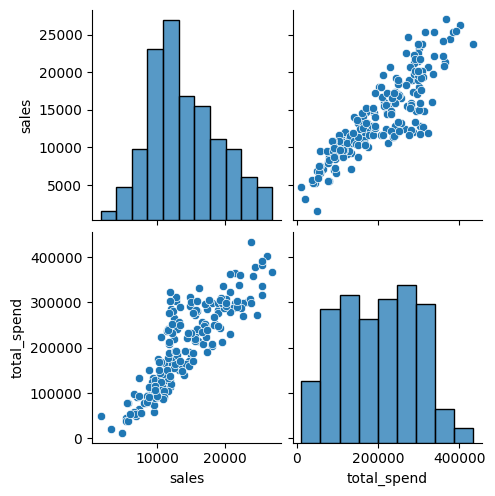

In [22]:
sns.pairplot(df)
plt.show()

# STEP 4 : DATA PREPROCESSING
`Data cleaning`

In [23]:
df.duplicated().sum()

np.int64(0)

In [24]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

`Data Wrangling`

`Train-Test Split`

In [25]:
x = df[["total_spend"]]
y = df["sales"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 42)

# STEP 4 : MODELING

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [27]:
print("coefficients :",model.coef_)
print("intercept :",model.intercept_)

coefficients : [0.0489571]
intercept : 4169.512013489044


                                                    y = β₀ + β₁x
                                              Sales = 4008.7628 + 0.05012(x) 

# STEP 5 : EVALUATION

In [28]:
#prediction on training data
ypred_train = model.predict(x_train)
#Evaluation
from sklearn.metrics import mean_squared_error,r2_score
print("Train MSE : ",mean_squared_error(y_train,ypred_train))
print("Train RMSE : ",np.sqrt(mean_squared_error(y_train,ypred_train)))
print("Train R2 : ",r2_score(y_train,ypred_train))

Train MSE :  6421575.106597045
Train RMSE :  2534.0826952956854
Train R2 :  0.7524092686260718


In [29]:
# prediction on testing data
ypred_test = model.predict(x_test)
# evaluation
print("Test MSE : ", mean_squared_error(y_test,ypred_test))
print("Test RMSE : ", np.sqrt(mean_squared_error(y_test,ypred_test)))
print("Test R2: ", r2_score(y_test,ypred_test))

Test MSE :  7779806.406885764
Test RMSE :  2789.230432733331
Test R2:  0.7535196255373878


In [30]:
# cross validation score
from sklearn.model_selection import cross_val_score
print("CV score : ",cross_val_score(model,x_train,y_train,cv = 5,scoring = "r2").mean())

CV score :  0.7241357509169324


In [31]:
CV_score_MSE = cross_val_score(model,x,y,cv = 5,scoring = "neg_mean_squared_error").mean()
print("CV score MSE : ",CV_score_MSE)
print("CV score RMSE",np.sqrt(abs(CV_score_MSE)))

CV score MSE :  -6848762.6024445575
CV score RMSE 2617.014062332214


In [32]:
model.predict([[200000]])

array([13960.93124868])

# STEP 6 : MODEL SELECTION

`Check list`
1. check wheather model has overfitting or underfitting : Train error = Test error (Approximately) --> Good model
2. is test accuracy = cross validation score            : Test accuracy = cross validation score
3. check model meets the bussiness problem requirement  :
4. LINE Assumputions                                    : 

                                                    y = β₀ + β₁x
                                              Sales = 4008.7628 + 0.05012(x) 
                      If we spend 200000$ in our next ad campain, we can expect a sales of 13960.9312

`Interpreting the coefficients`
- A **1 unit increase** in the total spend is associated with an increase of 0.05012 units in the sales
- This means for every **10000** dollars we send we expect an increse on 501 units soled  in the sales

#### Check for Assumptions 
1. **Linearity of errors**

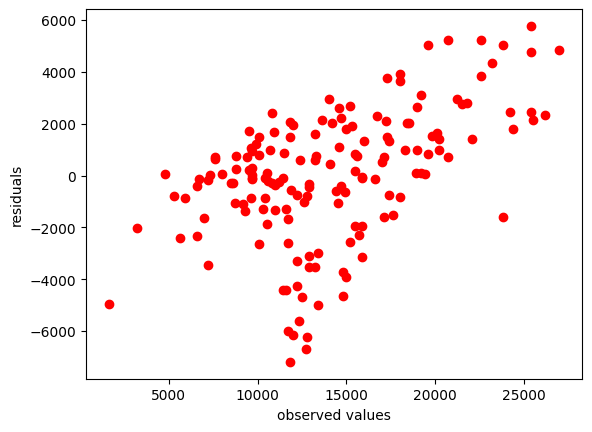

In [33]:
train_errors = y_train - ypred_train
plt.scatter(y_train , train_errors,c = "r")
plt.xlabel("observed values")
plt.ylabel("residuals")
plt.show()

2. **Normality of Errors**

In [34]:
train_errors.skew()

np.float64(-0.4258588535883839)

3. **Equality of variance**

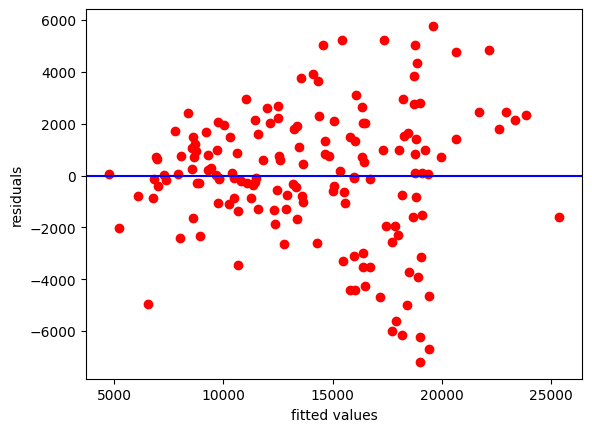

In [35]:
plt.scatter(ypred_train , train_errors , c = "r")
plt.axhline(y = 0,c = "blue")
plt.xlabel("fitted values")
plt.ylabel("residuals")
plt.show()

4. **Independence of errors (Variable significance)**

In [36]:
import statsmodels.formula.api as smf
model1 = smf.ols("y~x",data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 21 Aug 2025   Prob (F-statistic):           5.06e-62
Time:                        14:34:31   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
x              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

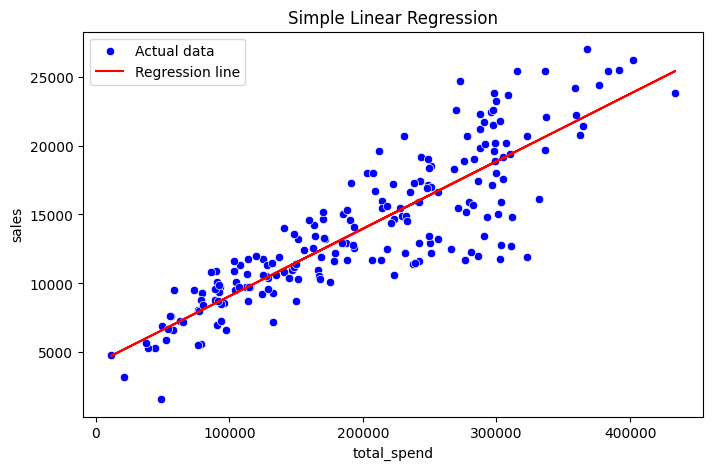

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='total_spend', y="sales",data = df,color='blue', label='Actual data')
plt.plot(x_train, ypred_train, color='red', label='Regression line')
plt.xlabel("total_spend")
plt.ylabel("sales")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# SAVE THE MODEL

In [38]:
from joblib import dump
dump(model,"sales_model.joblib")

['sales_model.joblib']